# Homework 4-Basic Data Manipulation and Visualization



# **Assignment Submission Guidelines**


Please follow the guidelines below for submitting your assignment:

1. **Submission Deadline:**
   - All assignments must be submitted **no later than 11:59 PM Next Monday (10/20) Midnight**.
   - Late submissions will not be accepted unless prior arrangements have been made by the instructor.

2. **Submission Platform:**
   - Submit your assignment through **Canvas**. Ensure that you upload the files to the correct assignment link.

3. **Required Files:**
   - **Jupyter Notebook file (.ipynb):** Submit the Jupyter Notebook file you used to complete the assignment. The file should contain your well-commented code.
   - **PDF Version (.pdf file):** Additionally, submit a PDF version of your Python code. This can be a printout or export of your script, showing all the code with any necessary explanations or output results included.

4. **File Naming Convention:**
   - Please name your files as follows: `Lastname_Firstname_AssignmentName`
   - Example: `Alex_John_Homework4.ipynb` and `Alex_Johb_Homework4.pdf`

5. **Technical Issues:**
   - If you encounter any technical issues with Canvas or your submission, please contact the TAs immediately **before the deadline** to avoid penalties.


## 1. Load and Inspect Data (10 Points)



Load the 2012_Workplace_Fatalities_by_State.csv file into a Pandas DataFrame.

Display the first 50 rows of data in the first column.

Replace all missing values with 0.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data=pd.read_csv('2012_Workplace_Fatalities_by_State.csv')

### This block shows us the total counts of NaN data in each column. Although not necessary, it is helpful to know.

In [31]:
data.isna().sum()

State                                    3
Number of Fatalities, 2012               3
Rate of Fatalities, 2012                 3
State Rank, Fatalities 2012              4
Number of Injuries/Illnesses 2012       12
Injuries/Illnesses 2012 Rate            11
Penalties FY 2013 (Average $)            4
Penalties FY 2013 (Rank)                 4
Inspectors                               5
Years to Inspect Each Workplace Once     4
State or Federal Program                 4
dtype: int64

In [32]:
data['State'].head(50)

0     South Carolina\n(33.99882060100049, -81.045367...
1     West Virginia\n(38.665511497000466, -80.712639...
2     Massachusetts\n(42.27687306500047, -72.0826898...
3     Tennessee\n(35.680943063000484, -85.7744864219...
4     Oklahoma\n(35.472034350000456, -97.52106845499...
5     Illinois\n(40.48501278700047, -88.99770813999965)
6     Nebraska\n(41.64104043900045, -99.36571864599966)
7     Delaware\n(39.00883351400046, -75.57773943699965)
8      Hawaii\n(21.30485166200043, -157.85774691599974)
9        Iowa\n(42.469404401000475, -93.81648936699969)
10    Arizona\n(34.865973091000455, -111.76380949799...
11    Florida\n(28.932042899000464, -81.92895558499964)
12    Virginia\n(37.54268075100049, -78.45788924199968)
13    Missouri\n(38.63579372300046, -92.56629737199967)
14    Michigan\n(44.66131575600048, -84.71438724399968)
15     Indiana\n(39.76691364600049, -86.14995579899966)
16    North Carolina\n(35.46622388600048, -79.159249...
17    New Hampshire\n(43.6559537330005, -71.5003

### I decided to fill all NaN values in the entire dataset with `0`

In [33]:
data.fillna(0, inplace=True)

##  2. Clean up the state names (10 Points)

The first column ('State') that contains both U.S. state names and their coordinates in a messy format. Please remove the coordinates between the state names. Add two columns of longitude and latitude to the data.

In [34]:
# This function manipulates the values in the State column.
# I made comments that print out what is happening, which I found useful when trying to figure out the best way to loop.
# Note, this can only be run once, while it works, it is not modular...Hard-coded. So if I messed up, I would have to re=load the data.
def Clean_State_Names(data):
    State_data = data['State']
    lat=list()
    long=list()
    for i, key in State_data.items():
        if isinstance(key, int):
            continue
        try:
            #print("Row: ", i)
            key_split = key.splitlines()
            key_str = str(key_split[0])
            
            # replace the rows in State col ===========================================================================================
            data['State'].replace(data['State'].iloc[i], key_str, inplace=True)
            # replace the rows in State col ===========================================================================================
            
            #print(key_split)
            coordinates = key_split[1].strip("()")
            lat_str,long_str = coordinates.split(",")
            lat.append(float(lat_str))
            long.append(float(long_str))
            #print("================")
        except: # There will be errors, but they don't matter because those errors concern the NaN values/'0' values...
            pass
    # Hard-coded, added four zeros to the lat/long lists because the lengths do not match the length of the dataframe...
    for i in range(4):
        x=0
        lat.append(x)
        long.append(x)
    data['Latitiude'] = lat
    data['Longitude'] = long
    return data
data_0 = Clean_State_Names(data)

In [35]:
#data_0

,State,"Number of Fatalities, 2012","Rate of Fatalities, 2012","State Rank, Fatalities 2012",Number of Injuries/Illnesses 2012,Injuries/Illnesses 2012 Rate,Penalties FY 2013 (Average $),Penalties FY 2013 (Rank),Inspectors,Years to Inspect Each Workplace Once,State or Federal Program,Latitiude,Longitude
0,South Carolina,63.0,3.5,25.0,36200.0,3.0,492.0,49.0,24.0,111.0,State,33.998821,-81.045368
1,West Virginia,49.0,6.9,46.0,19800.0,4.1,1798.0,27.0,7.0,173.0,Federal,38.665511,-80.712639
2,Massachusetts,44.0,1.4,1.0,69700.0,3.1,1929.0,21.0,33.0,123.0,Federal,42.276873,-72.082690
3,Tennessee,101.0,3.8,30.0,65100.0,3.5,727.0,45.0,30.0,82.0,State,35.680943,-85.774486
4,Oklahoma,97.0,6.1,42.0,39000.0,3.6,1872.0,24.0,19.0,131.0,Federal,35.472034,-97.521068
5,Illinois,146.0,2.5,10.0,124900.0,3.2,1876.0,23.0,74.0,137.0,Federal,40.485013,-88.997708
6,Nebraska,48.0,5.2,38.0,24300.0,3.9,2565.0,5.0,9.0,128.0,Federal,41.641040,-99.365719
7,Delaware,14.0,3.1,18.0,7900.0,2.8,2406.0,6.0,5.0,175.0,Federal,39.008834,-75.577739
8,Hawaii,20.0,3.4,22.0,13700.0,3.8,964.0,39.0,20.0,79.0,State,21.304852,-157.857747
9,Iowa,97.0,6.6,44.0,45600.0,4.5,790.0,43.0,26.0,98.0,State,42.469404,-93.816489


## 3. Statistics Summary (a) (10 Points)
Write a Python function named statistics_summary() that summarizes the "State	Number of Fatalities, 2012" distribution. The function include: mean, standard deviation, median,maximum number of fatalities, the index of the maximum number of fatalities, the state name of the maximum number of fatalities, and the histogram plot.

### I dropped the last index because that was skewing the results of the function below.

--------------Information for Index of Number of Fatalities, 2012--------------
Mean:-> 87
STD:--> 91
Median:---> 65
Maximum:----> 536
--------------INDEX LOCATION of MAX Number of Fatalities, 2012:  48 -------------- 

----------------------STATE NAME:  Texas ----------------------
State                                       Texas
Number of Fatalities, 2012                  536.0
Rate of Fatalities, 2012                      4.8
State Rank, Fatalities 2012                  35.0
Number of Injuries/Illnesses 2012        203200.0
Injuries/Illnesses 2012 Rate                  2.7
Penalties FY 2013 (Average $)              2187.0
Penalties FY 2013 (Rank)                     10.0
Inspectors                                   98.0
Years to Inspect Each Workplace Once        136.0
State or Federal Program                  Federal
Latitiude                               31.827244
Longitude                              -99.426766
Name: 48, dtype: object


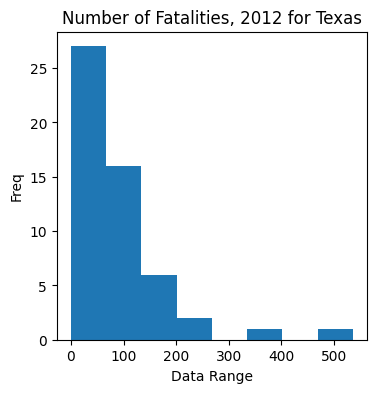

In [96]:
# Hard-coded the index drop:
data_1 = data_0.drop(53).copy()
def statistics_summary(data=None, target=None):
    print(f"--------------Information for Index of {target}--------------")
    # used numpy to do all the calculations for me.
    print("Mean:->", round(np.mean(data[target])))
    print("STD:-->", round(np.std(data[target])))
    print("Median:--->", round(np.median(data[target])))
    print("Maximum:---->", round(np.max(data[target])))

    max_idx = np.max(data[target])
    # Specific information ================================
    for index, value in enumerate(data[target]):
        if value == max_idx:
            print(f"--------------INDEX LOCATION of MAX {target}: ", index, "--------------", "\n")
            print("----------------------STATE NAME: ", data['State'].iloc[index], "----------------------")
            print(data.iloc[index])
            max_idx_loc = index

    plt.figure(figsize=(4,4))
    plt.hist(data[target], bins=8)
    plt.title(f"{target} for {data['State'].iloc[max_idx_loc]}")
    plt.xlabel("Data Range")
    plt.ylabel("Freq")
    plt.show()
    print()
statistics_summary(data_1, 'Number of Fatalities, 2012')

## 4. Statistics Summary (b) (10 Points)

By using for loop, show the statistics summary of "Number of Injuries/Illnesses 2012", "Penalties FY 2013", "Inspectors", and "Years to Inspect Each Workplace"

--------------Information for Index of Number of Injuries/Illnesses 2012--------------
Mean:-> 50858
STD:--> 60355
Median:---> 36200
Maximum:----> 345400
--------------INDEX LOCATION of MAX Number of Injuries/Illnesses 2012:  49 -------------- 

----------------------STATE NAME:  California ----------------------
State                                   California
Number of Fatalities, 2012                   375.0
Rate of Fatalities, 2012                       2.3
State Rank, Fatalities 2012                    6.0
Number of Injuries/Illnesses 2012         345400.0
Injuries/Illnesses 2012 Rate                   3.5
Penalties FY 2013 (Average $)               6422.0
Penalties FY 2013 (Rank)                       1.0
Inspectors                                   216.0
Years to Inspect Each Workplace Once         179.0
State or Federal Program                     State
Latitiude                                 37.63864
Longitude                              -120.999999
Name: 49, dtype: objec

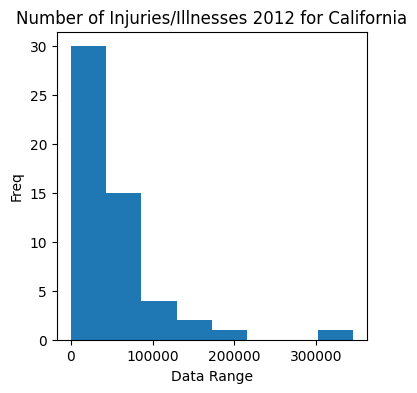


--------------Information for Index of Penalties FY 2013 (Average $)--------------
Mean:-> 1630
STD:--> 1009
Median:---> 1798
Maximum:----> 6422
--------------INDEX LOCATION of MAX Penalties FY 2013 (Average $):  49 -------------- 

----------------------STATE NAME:  California ----------------------
State                                   California
Number of Fatalities, 2012                   375.0
Rate of Fatalities, 2012                       2.3
State Rank, Fatalities 2012                    6.0
Number of Injuries/Illnesses 2012         345400.0
Injuries/Illnesses 2012 Rate                   3.5
Penalties FY 2013 (Average $)               6422.0
Penalties FY 2013 (Rank)                       1.0
Inspectors                                   216.0
Years to Inspect Each Workplace Once         179.0
State or Federal Program                     State
Latitiude                                 37.63864
Longitude                              -120.999999
Name: 49, dtype: object


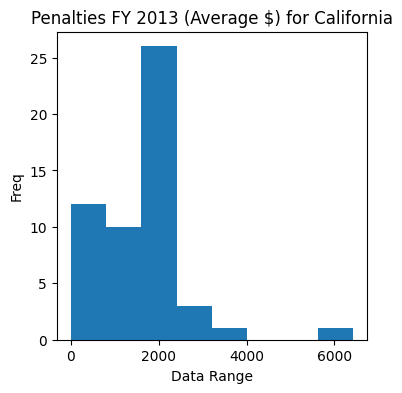


--------------Information for Index of Years to Inspect Each Workplace Once--------------
Mean:-> 117
STD:--> 76
Median:---> 111
Maximum:----> 521
--------------INDEX LOCATION of MAX Years to Inspect Each Workplace Once:  20 -------------- 

----------------------STATE NAME:  South Dakota ----------------------
State                                   South Dakota
Number of Fatalities, 2012                      31.0
Rate of Fatalities, 2012                         6.7
State Rank, Fatalities 2012                     45.0
Number of Injuries/Illnesses 2012                0.0
Injuries/Illnesses 2012 Rate                     0.0
Penalties FY 2013 (Average $)                 2346.0
Penalties FY 2013 (Rank)                         7.0
Inspectors                                       0.0
Years to Inspect Each Workplace Once           521.0
State or Federal Program                     Federal
Latitiude                                  44.353133
Longitude                                -100.3735

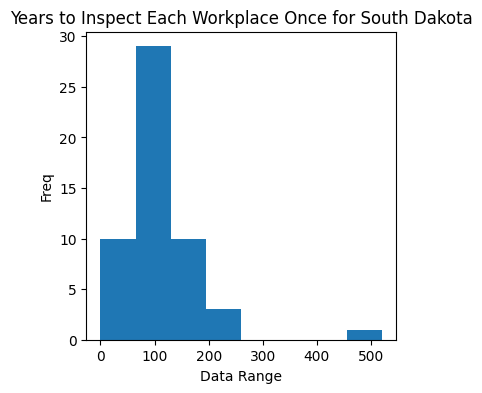

In [97]:
col_list = ['Number of Injuries/Illnesses 2012', 'Penalties FY 2013 (Average $)', 'Years to Inspect Each Workplace Once']
for col in col_list:
    statistics_summary(data_1, col)

## 5. Show the Pair Plot  (30 Points)

Divide the data into two populations based on the "state number of Fatalities, 2012":

one group with Fatalities >= 100, and

the other with Fatalities < 100.

Create the pair plots among all variables, and replace the diagonal plots with 1D histograms.

In [98]:
# Function for 1d histogram plot
mask_dict={
          "Group_1": data_1['Number of Fatalities, 2012'] >= 100,
          "Group_2": data_1['Number of Fatalities, 2012'] < 100
      }
# Histogram plot function =======================================================
# note, I named x, target_col because putting it in a word was helpful for me.
# also, mask_dict is the filter/group we applied to the column we wanted to test.
def histo(data=None, target_col=None, mask_dict=None, **kwargs):
    for label, mask in mask_dict.items():
        _=plt.hist(data[mask][target_col], label=label, **kwargs)
        _=plt.xlabel(f"Distribution for {target_col}")
        _=plt.legend()

# Scatter plot function =======================================================
# note, I renamed x,y to explan_var and predict_var because using statistical terms made this function easier to write.
def scatter(data=None, explan_var=None, pred_list=None, mask_dict=None, **kwargs):
    for label, mask in mask_dict.items():
        for predict_var in pred_list:
            _=plt.scatter(data[mask][explan_var], data[mask][predict_var], label=label, **kwargs)
            _=plt.xlabel(f"Distribution for {explan_var} vs {predict_var}")
            _=plt.legend()

### Test the independent plotting functions below

In [99]:
#histo(data=data_1, target_col='Number of Fatalities, 2012', mask_dict=mask_dict,
#      bins=10, density=1, alpha=0.5)
            
#scatter(data=data_1, explan_var='Number of Fatalities, 2012',
#        pred_list=['Years to Inspect Each Workplace Once'],
#        mask_dict=mask_dict)

## Answer to Exercise 6.

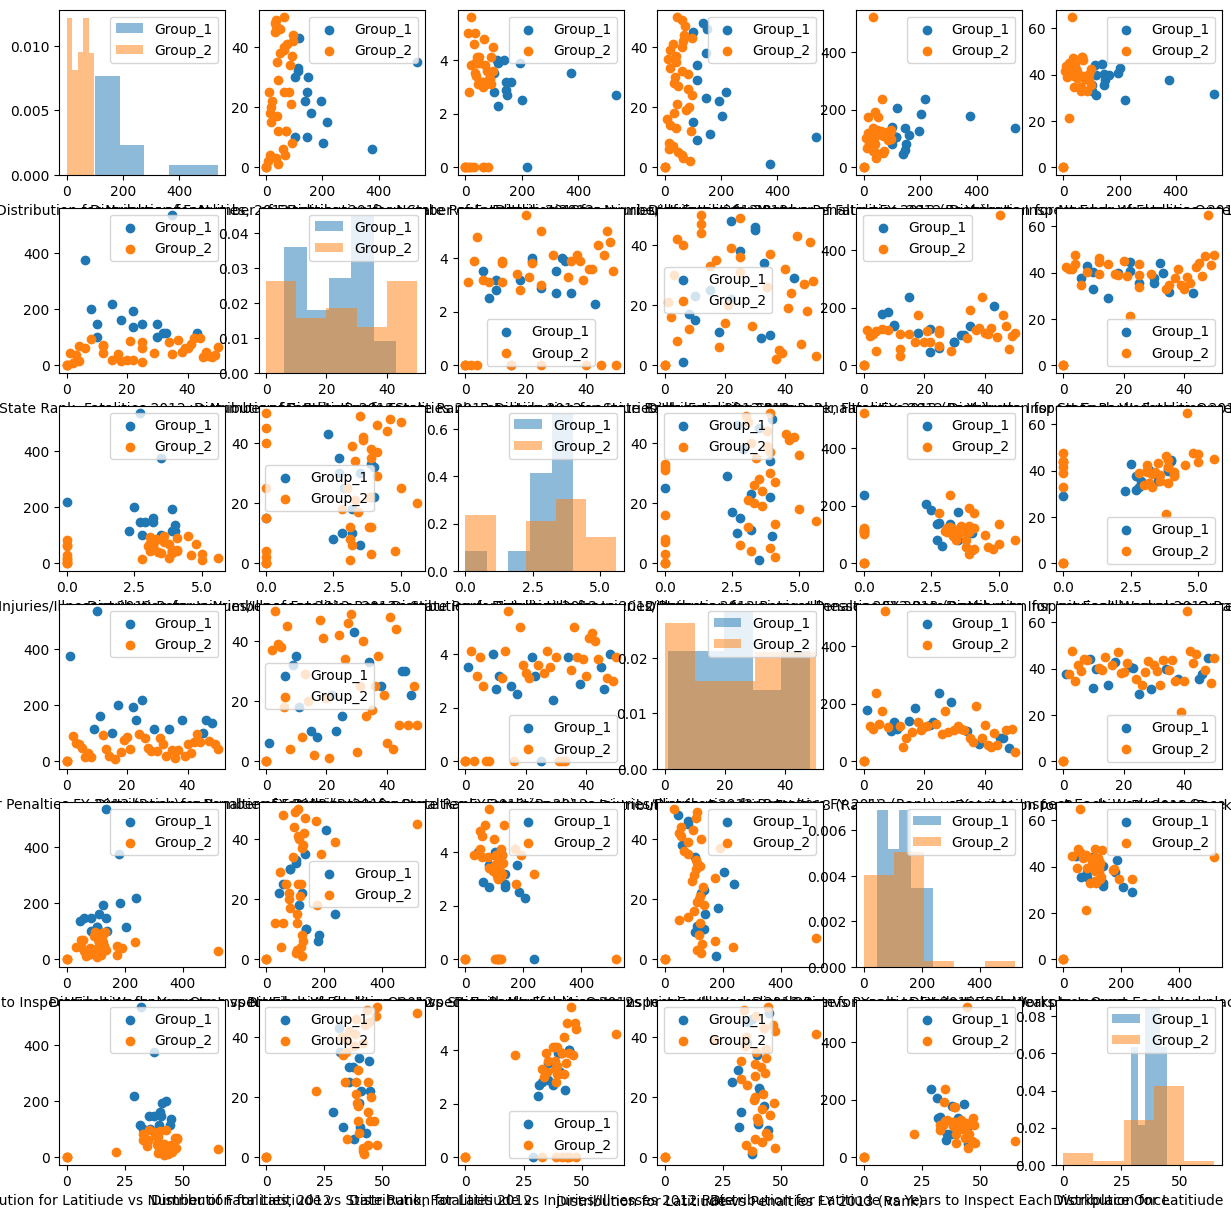

In [100]:
mask_dict={
          "Group_1": data_1['Number of Fatalities, 2012'] >= 100,
          "Group_2": data_1['Number of Fatalities, 2012'] < 100
      }
# I create a col_list for all the numerical columns, removing the categorical columns because they raise errors. 
# Also because we can't run stats on strings. 
col_list = [col for col in data_1.columns]
for i in col_list:
    if i == 'State' or 'State or Federal Program': # Skipping categorical vars!
        col_list.remove(i)


# The pair plot is done in a for loop.
plot_i = 0
n = len(col_list)
plt.figure(figsize=(15,15))
for i, x_column_name in enumerate(col_list):
    for j, y_column_name in enumerate(col_list):
        plot_i +=1
        # change the subplt and legend
        plt.subplot(n,n,plot_i)
        if i == j:
            histo(data=data_1, target_col=x_column_name, mask_dict=mask_dict,
                bins=5, alpha=0.5, density=1, stacked=True)
        else:
            scatter(data=data_1, explan_var=x_column_name,
                    pred_list=[y_column_name],
                    mask_dict=mask_dict)